In [1]:
import tensorflow as tf

In [2]:
data_dir = "../dataset"
batch_size = 32
img_height = img_width = 300
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3846 files belonging to 2 classes.
Using 3077 files for training.


In [3]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3846 files belonging to 2 classes.
Using 769 files for validation.


In [4]:
class_names = train_ds.class_names
print(class_names)

['with_mask', 'without_mask']


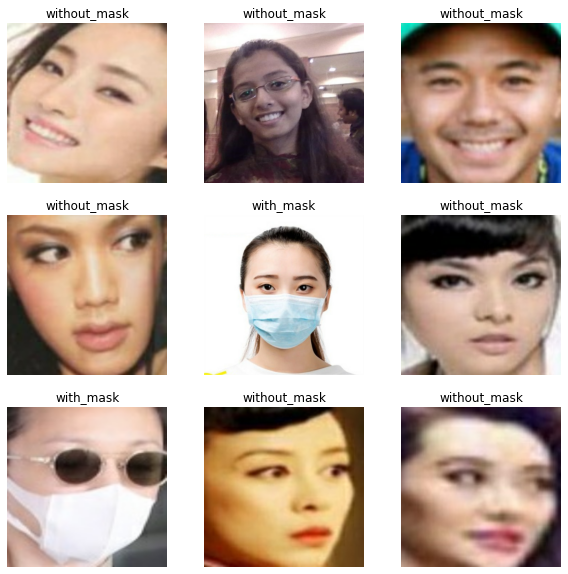

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  print(labels_batch)
  break

(32, 300, 300, 3)
(32,)
tf.Tensor([0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0], shape=(32,), dtype=int32)


In [7]:
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [8]:
import numpy as np
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 0.9808513


In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
from tensorflow.keras import layers
num_classes = 2

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [11]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=30
)

Epoch 1/30
97/97 [==============================] - 9s 92ms/step - loss: 0.3787 - accuracy: 0.8515 - val_loss: 0.3052 - val_accuracy: 0.8986
Epoch 2/30
97/97 [==============================] - 5s 56ms/step - loss: 0.1870 - accuracy: 0.9340 - val_loss: 0.2534 - val_accuracy: 0.9090
Epoch 3/30
97/97 [==============================] - 5s 56ms/step - loss: 0.1598 - accuracy: 0.9405 - val_loss: 0.3651 - val_accuracy: 0.8791
Epoch 4/30
97/97 [==============================] - 5s 56ms/step - loss: 0.1054 - accuracy: 0.9607 - val_loss: 0.1461 - val_accuracy: 0.9571
Epoch 5/30
97/97 [==============================] - 5s 56ms/step - loss: 0.0766 - accuracy: 0.9724 - val_loss: 0.1803 - val_accuracy: 0.9532
Epoch 6/30
97/97 [==============================] - 5s 56ms/step - loss: 0.0472 - accuracy: 0.9821 - val_loss: 0.1663 - val_accuracy: 0.9545
Epoch 7/30
97/97 [==============================] - 5s 56ms/step - loss: 0.0256 - accuracy: 0.9916 - val_loss: 0.1634 - val_accuracy: 0.9597
Epoch 8/30
97

In [ ]:
from tensorflow.keras.preprocessing import image
img_path = '/mnt/mount-3.7T/masud/Project/EduProject/Face_Mask_Detection/dataset/without_mask/0_0_caiguoqing_0093.jpg'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(300, 300))
# Imports PIL module  
# from PIL import Image 
  
# # open method used to open different extension image file 
# im = Image.open(img_path)  

img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_batch)

print(prediction)
print(np.argmax(prediction[0]))

In [ ]:
model.save('../model/my_model') 
new_model = tf.keras.models.load_model('../model/my_model')

# Check its architecture
new_model.summary()